In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print type(mnist.train.images), mnist.train.images.shape
print type(mnist.train.labels), mnist.train.labels.shape

<type 'numpy.ndarray'> (55000, 784)
<type 'numpy.ndarray'> (55000, 10)


In [9]:
#784 = 28 * 28

In [13]:
print mnist.train.labels[0]

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


(784,)
(28, 28)
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
(784,)
(28, 28)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
(784,)
(28, 28)
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
(784,)
(28, 28)
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
(784,)
(28, 28)
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
(784,)
(28, 28)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
(784,)
(28, 28)
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
(784,)
(28, 28)
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(784,)
(28, 28)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
(784,)
(28, 28)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


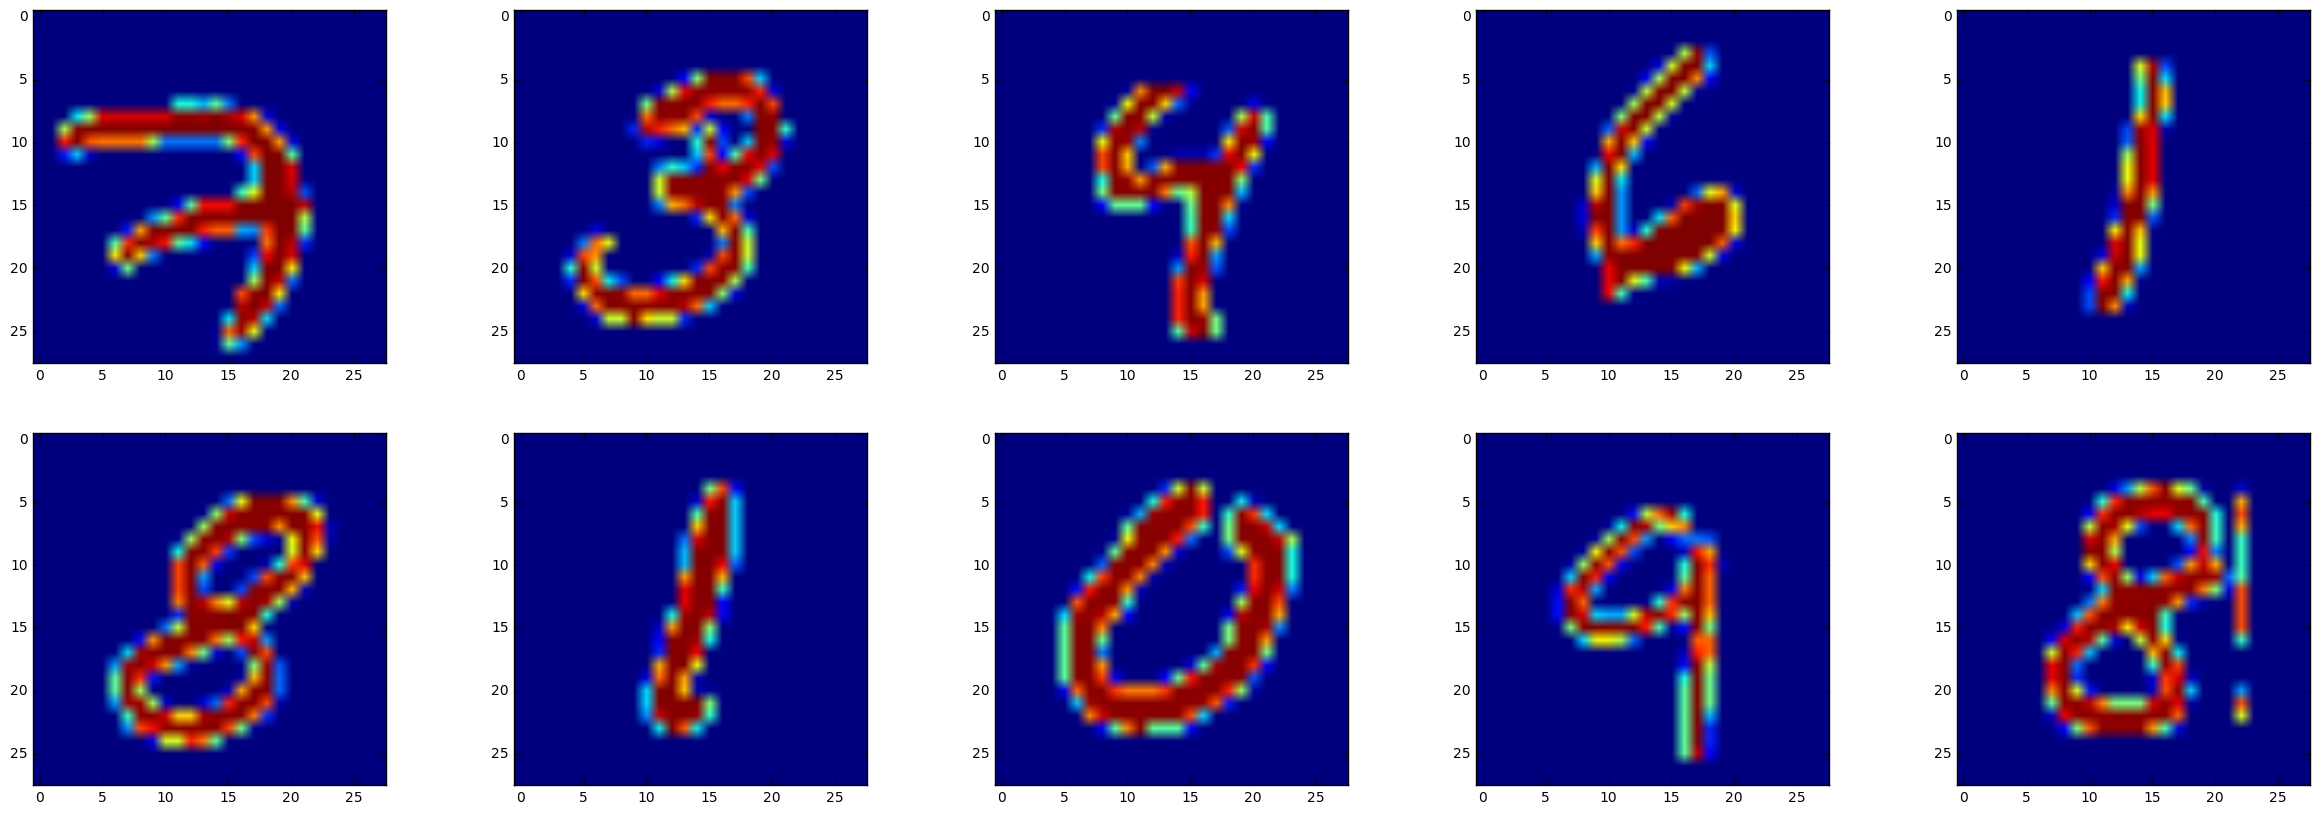

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(30, 10))
for i in range(10):
    img = np.array(mnist.train.images[i])
    print img.shape
    img.shape = (28, 28)
    print img.shape
    plt.subplot(2,5,(i+1))
    plt.imshow(img)
    print mnist.train.labels[i]

In [39]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [1, 784])
print "x -", x.get_shape()

x - (1, 784)


In [40]:
y = tf.placeholder(tf.float32, [1, 10])

In [41]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print "W -", W.get_shape()
print "b -", b.get_shape()

W - (784, 10)
b - (10,)


u1 = w11x1+w12x2+...+w1784x784+b1

...

u10 = w101x1+w102x2+...+w10784x784+b10

u = 1*10

w = 784*10

x = 784*10

b = 1*10

In [44]:
#아래 텐서플로 수식에서는 Wx가 x*W로 바뀜

In [69]:
u = tf.matmul(x, W) + b
print "u -", u.get_shape()

u - (1, 10)


In [104]:
z = tf.nn.softmax(u)

In [105]:
#error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(u, y))
error = tf.reduce_sum((z - y) * (z - y))/2

In [106]:
print error.get_shape()

()


In [107]:
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(error)

In [117]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(55000):
        for j in range(5):
            _, error_value = sess.run([optimizer, error], feed_dict={x: [mnist.train.images[i]], y: [mnist.train.labels[i]]})
        #if i%3000 == 0:
            #print error_value
    z_value1 = sess.run(z, feed_dict={x: [mnist.train.images[10]]})
    z_value2 = sess.run(z, feed_dict={x: [mnist.train.images[15]]})
    z_value3 = sess.run(z, feed_dict={x: [mnist.train.images[19]]})
    print z_value1
    print z_value2
    print z_value3
    
    sum = 0
    diff_index_list = []
    
    for i in range(100):
        print i,
        z_value = sess.run(tf.argmax(z, 1), feed_dict={x:[mnist.test.images[i]]})
        y_value = sess.run(tf.argmax(y, 1), feed_dict={y:[mnist.test.labels[i]]})
        
        if (z_value == y_value):
            sum = sum + 1
        else:
            diff_index_list.append(i)
            #print "%d - %d: %s" % (diff_a[i], diff_b[i], diff_a[i] == diff_b[i])

    print sum / 100.0
    print len(diff_index_list)

[[  9.99999523e-01   5.63780365e-17   1.09272627e-08   4.01390643e-10
    6.13581397e-13   4.70523958e-08   4.38844516e-11   4.31559411e-13
    4.68047034e-07   3.97211569e-11]]
[[  9.99999762e-01   2.24224382e-20   1.29347904e-11   9.74860993e-14
    2.77645694e-14   2.64934613e-07   1.17726176e-10   3.21934624e-14
    8.01799871e-09   2.19388201e-12]]
[[  1.00000000e+00   5.58268913e-20   4.80080420e-10   1.82725501e-09
    1.02629236e-20   4.98058839e-09   9.92800135e-14   8.89588967e-14
    1.42638895e-12   1.69625481e-16]]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0.0096
4
